## Understanding Surface Parameters (1) Albedo

- [student name]
- [group]

### Objectives
 1. Review [Python programming](../python.rst) and [Jupyter Notebook](../JupyterNotebook.rst).
 2. Become familiar with [GitHub/Git-based workflow](../GitHub.rst)
 3. Prepare plots of surface radiation and energy balance using assigned [AmeriFlux observations](../DataSource.rst) under two scenarios: one clear day and one cloudy day.

<div class="alert alert-info">

**Tips:** 

1. Check the fluxes make sense.
2. Think about the time of day.
3. Calculate the albedo through the day for both days.
3. How does the albedo vary through the day?
3. How do your site values compare to the literature?
3. How does the albedo vary through the year?
3. If you had to use one albedo value to model the site, what would it be?
1. For scientific background see [Albedo](../Parameters.rst#albedo) and [Reading List](../ReadingList.rst)

</div>



### What to bring in the next class

- Print out with Figure captions
  - Plot of the radiation balance for a cloudy and a sunny day
  - Plot of albedo variation on both days (i.e. 1 plot)
- Literature values of albedo for your land cover types
  - Bring a journal article that has some albedo values
  - Note features of the paper structure: figure/table captions, multiple figures, text structure, referencing etc.


### familiarise yourself with Jupyter Notebook

1. how to create a code cell?
2. how to write in markdown? normal text and equations.
3. how to install plug-ins for enhanced productivity?
4. what is the "best practice"?

### Tasks

#### load necessary packages

In [1]:
#these are necessary packages that are needed later on. Always try to load all the packages in one place for consistency
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

#### load data

In [2]:
#The path of the directory where all AMF data are
#path_dir = Path.cwd()/'data'/'AMF-clean'
path_dir = Path.cwd()/'data'/'1'

In [3]:
name_of_site = 'CA-Obs_clean.csv.gz'
path_data = path_dir/name_of_site
path_data.resolve()


PosixPath('/Users/sunt05/Dropbox/6.Repos/BLM/docs/tasks/data/1/CA-Obs_clean.csv.gz')

In [4]:
df_data = pd.read_csv(path_data, index_col='time',parse_dates=['time'])


#### Let's look at the site info

In [5]:
all_sites_info =  pd.read_csv('data/site_info.csv')
site_info=all_sites_info[all_sites_info['Site Id'] == name_of_site.split('_clean')[0]]
site_info

Site Id                                               Name  \
24  CA-Obs  Saskatchewan - Western Boreal, Mature Black Sp...   

                   Principal Investigator  Data Availability  \
24  T. Andrew Black (andrew.black@ubc.ca)                NaN   

   Vegetation Abbreviation (IGBP) Vegetation Description (IGBP)  \
24                            ENF  Evergreen Needleleaf Forests   

   Climate Class Abbreviation (Koeppen)  \
24                                  Dfc   

                  Climate Class Description (Koeppen)  \
24  Subarctic: severe winter, no dry season, cool ...   

    Mean Average Precipitation (mm)  Mean Average Tempurature (degrees C)  \
24                            406.0                                  0.79   

   Country  Latitude (degrees)  Longitude (degrees)  Elevation (m)  \
24  Canada               53.99              -105.12         628.94   

                                        Years of Data  
24  1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004...

#### examine data

##### Loading the first 5 rows of the dataframe

In [6]:
df_data.head(5)

WS      RH      TA      PA      WD   P  SWIN    LWIN  \
time                                                                           
1997-01-01 00:30:00  2.988  73.036 -24.570  93.942  102.84 NaN -0.14  213.39   
1997-01-01 01:00:00  2.671  73.146 -24.562  93.887   96.09 NaN -0.03  216.73   
1997-01-01 01:30:00  2.303  73.151 -24.431  93.934  112.34 NaN  0.24  223.46   
1997-01-01 02:00:00  2.789  73.093 -24.379  93.917  109.16 NaN -0.04  218.32   
1997-01-01 02:30:00  2.274  73.140 -24.284  93.977  115.74 NaN  0.14  217.89   

                     SWOUT   LWOUT  NETRAD   H  LE  
time                                                
1997-01-01 00:30:00   0.01  214.83   -1.59 NaN NaN  
1997-01-01 01:00:00   0.03  215.03    1.64 NaN NaN  
1997-01-01 01:30:00   0.02  215.91    7.77 NaN NaN  
1997-01-01 02:00:00   0.00  215.72    2.56 NaN NaN  
1997-01-01 02:30:00   0.01  215.99    2.02 NaN NaN

##### Let's print some statistics of the data

In [7]:
df_data.describe()

WS             RH             TA             PA  \
count  238448.000000  229874.000000  238667.000000  240170.000000   
mean        3.172124      71.485567       1.575805      94.397486   
std         1.639812      20.879365      13.407671       0.787622   
min         0.000000      10.489000     -39.044000      91.036000   
25%         2.011750      56.332000      -8.015000      93.887000   
50%         3.012000      76.310500       2.675000      94.425000   
75%         4.150000      88.808750      12.394000      94.927000   
max        12.700000     100.000000      34.285000      97.119000   

                  WD              P           SWIN           LWIN  \
count  237611.000000  241918.000000  230236.000000  237977.000000   
mean      203.736355       0.028065     134.473282     275.558687   
std       104.352713       0.290372     214.059785      59.812764   
min         0.000000       0.000000      -5.000000     103.510000   
25%       108.000000       0.000000       0.040000     234.920000   
50%       223.640000       0.000000       5.610000     279.820000   
75%       297.750000       0.000000     194.830000     320.520000   
max       360.000000      63.500000    1040.700000     441.820000   

               SWOUT          LWOUT         NETRAD              H  \
count  235068.000000  236028.000000  227196.000000  180966.000000   
mean       12.899450     324.529321      72.224458      39.182785   
std        18.685514      62.699211     177.566033     101.819972   
min        -4.600000     154.150000    -156.930000    -293.600000   
25%         0.010000     277.650000     -45.980000     -13.400000   
50%         0.710000     322.980000      -2.610000      -0.722000   
75%        22.380000     371.810000     119.030000      51.560000   
max       157.880000     515.451000     863.290000     767.900000   

                  LE  
count  178521.000000  
mean       26.113666  
std        48.902425  
min      -230.800000  
25%        -0.021000  
50%         3.780000  
75%        27.770000  
max       641.300000

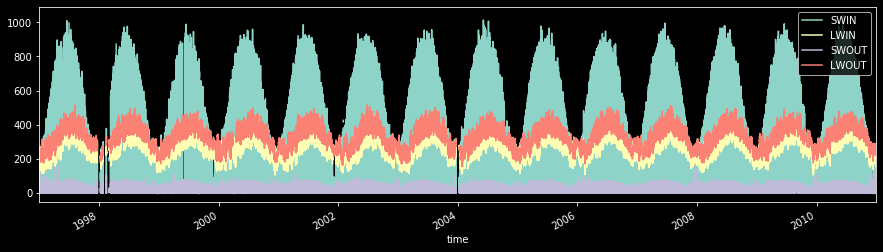

In [8]:
df_data.loc[:,['SWIN','LWIN','SWOUT','LWOUT']].plot(figsize=(15,4))

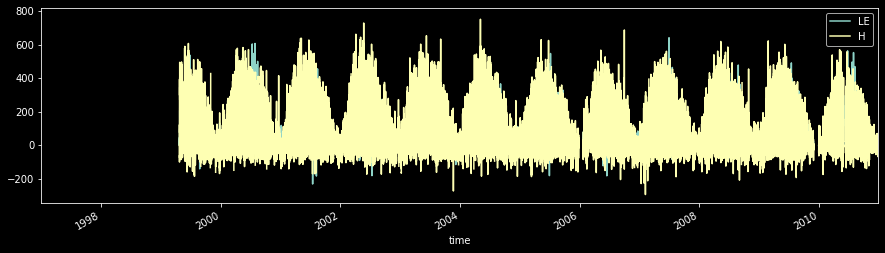

In [9]:
df_data.loc[:,['LE','H']].plot(figsize=(15,4))

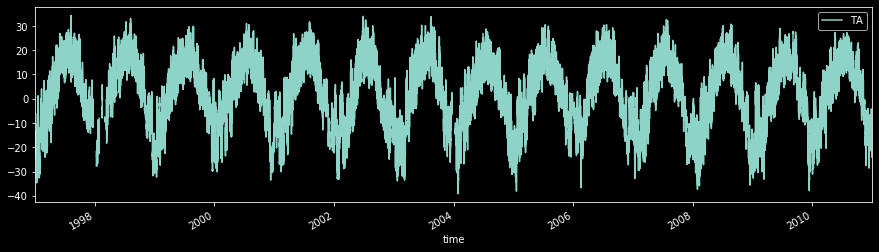

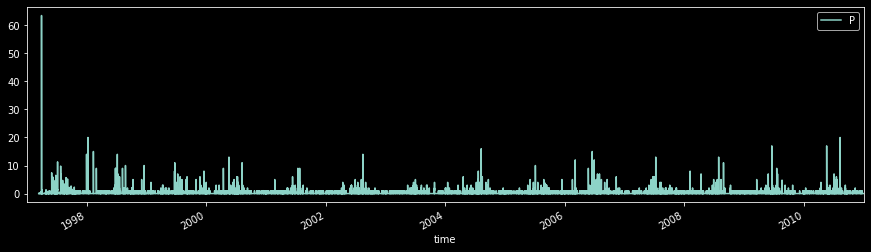

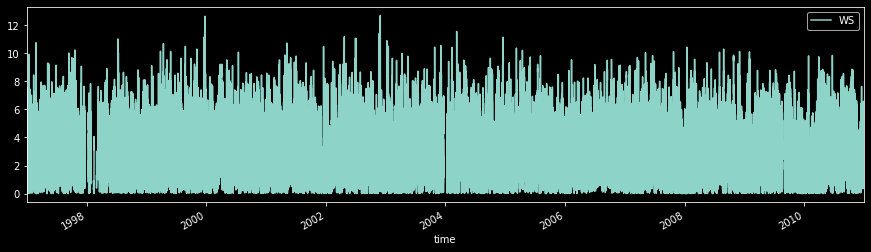

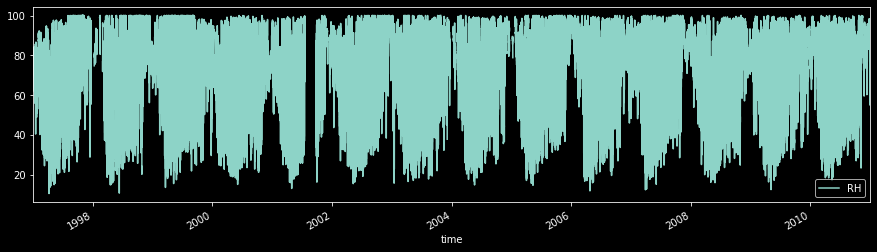

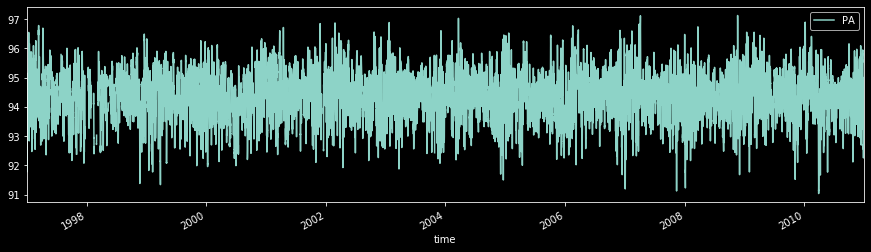

In [10]:
df_data.loc[:,['TA']].plot(figsize=(15,4))
df_data.loc[:,['P']].plot(figsize=(15,4))
df_data.loc[:,['WS']].plot(figsize=(15,4))
df_data.loc[:,['RH']].plot(figsize=(15,4))
df_data.loc[:,['PA']].plot(figsize=(15,4))

#### plot data

##### radiation balance

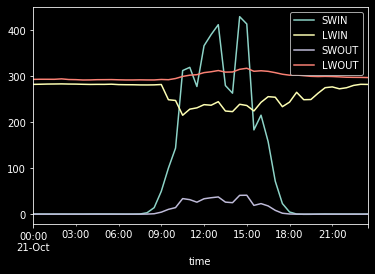

In [11]:
date = '2001 10 21'
df_data.loc[:,['SWIN','LWIN','SWOUT','LWOUT']].dropna().loc[date].plot()

##### examining if NETRAD == (SWIN-SWOUT)+(LWIN-LWOUT)

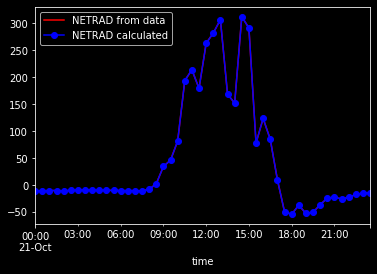

In [12]:
NetSW = df_data.loc[date,'SWIN']-df_data.loc[date,'SWOUT']
NetLW = df_data.loc[date,'LWIN']-df_data.loc[date,'LWOUT']
Netrad_calc=NetSW+NetLW
df_data.loc[date,'NETRAD'].plot(color='r',label='NETRAD from data')
Netrad_calc.plot(color='b',marker='o',label='NETRAD calculated')
plt.legend()

##### surface energy balance

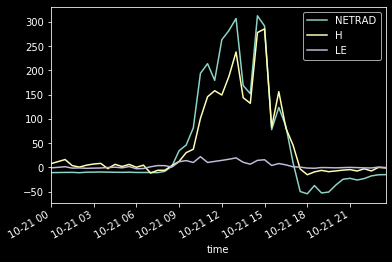

In [13]:
df_data.loc[:,['NETRAD','H','LE']].dropna().loc[date].plot()

#### calculate albedo

##### surface albedo

In [14]:
ser_alb=df_data['SWOUT']/df_data['SWIN']

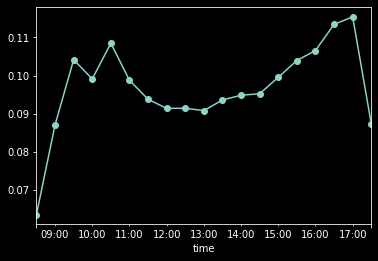

In [15]:
ser_alb[ser_alb.between(0,1)&(df_data['SWIN']>5)].loc[date].plot(marker='o')